In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics
from scipy import stats

import math
from datetime import datetime

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# View max columns
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_csv('E:\LMS\LinearRegressionusingPython\df_prep.csv')
df = pd.DataFrame(df)
#E:\LMS\LinearRegressionusingPython\df_prep.csv

In [5]:
df

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0         65.0000   8450.0            7       2003          2003         706   
1         80.0000   9600.0            6       1976          1976         978   
2         68.0000  11250.0            7       2001          2002         486   
3         60.0000   9550.0            7       1915          1970         216   
4         84.0000  14260.0            8       2000          2000         655   
...           ...      ...          ...        ...           ...         ...   
2068      70.4352   8755.0            8       1936          1999         772   
2069      63.0000   7711.0            6       1936          1977        1440   
2070     112.5000  17572.5            4       1983          1996           0   
2071      52.0000  14375.0            9       1958          1958         111   
2072      98.0000   8820.0            9       1890          1996        1088   

      TotalBsmtSF  FirstFlr  2ndFlrSF  GrLivArea  FullBath  KitchenAbvGr  \
0             856     856.0       854       1710         2             1   
1            1262    1262.0         0       1262         2             1   
2             920     920.0       866       1786         2             1   
3             756     961.0       756       1717         1             1   
4            1145    1145.0      1053       2198         2             1   
...           ...       ...       ...        ...       ...           ...   
2068          992    1022.0      1038       2060         2             1   
2069         1440    1440.0         0       1440         2             2   
2070         1632    1632.0         0       1632         2             2   
2071          819    1344.0         0       1344         1             1   
2072         1088    1188.0       561       1869         1             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0  2003.000000           2         548   
1                6           1  1976.000000           2         460   
2                6           1  2001.000000           2         608   
3                7           1  1998.000000           3         642   
4                9           1  2000.000000           3         836   
...            ...         ...          ...         ...         ...   
2068             8           1  1999.000000           2         390   
2069             8           0  1980.418367           0           0   
2070             8           0  2017.000000           2         576   
2071             7           1  1958.000000           2         525   
2072             7           0  1963.000000           2         456   

      WoodDeckSF  OpenPorchSF  Property_Shape_Reg  LotConfig_Inside  \
0              0         61.0                   1                 1   
1            298          0.0                   1                 0   
2              0         42.0                   0                 1   
3              0         35.0                   0                 0   
4            192         84.0                   0                 0   
...          ...          ...                 ...               ...   
2068           0          0.0                   0                 0   
2069         321          0.0                   0                 1   
2070           0          0.0                   1                 1   
2071           0        118.0                   0                 0   
2072          48          0.0                   1                 0   

      Neighborhood_nghb  Dwelling_Type_1Fam  HouseStyle_2Story  \
0                     1                   1                  1   
1                     0                   1                  0   
2                     1                   1                  1   
3                     0                   1                  1   
4                     0                   1                  1   
...                 ...       

In [6]:
df.shape

(2073, 38)

In [7]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
df_prep = sc_x.fit_transform(df)   

In [8]:
df_prep

array([[-0.2873925 , -0.36397932,  0.50537149, ...,  0.80978441,
         0.93777383,  0.46122718],
       [ 0.50574323, -0.04347076, -0.15393317, ...,  0.80978441,
         0.93777383,  0.05831002],
       [-0.12876535,  0.41638935,  0.50537149, ...,  0.80978441,
         0.93777383,  0.68507005],
       ...,
       [ 2.22420398,  2.17848966, -1.47254248, ...,  0.80978441,
        -1.0663552 , -0.51622001],
       [-0.9747768 ,  1.28733652,  1.82398081, ..., -1.23489657,
         0.93777383, -0.59829573],
       [ 1.45750611, -0.26085917,  1.82398081, ..., -1.23489657,
        -1.0663552 , -0.78632374]])

In [11]:
sd = pd.DataFrame(df_prep, columns=df.columns)

In [9]:
df

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0         65.0000   8450.0            7       2003          2003         706   
1         80.0000   9600.0            6       1976          1976         978   
2         68.0000  11250.0            7       2001          2002         486   
3         60.0000   9550.0            7       1915          1970         216   
4         84.0000  14260.0            8       2000          2000         655   
...           ...      ...          ...        ...           ...         ...   
2068      70.4352   8755.0            8       1936          1999         772   
2069      63.0000   7711.0            6       1936          1977        1440   
2070     112.5000  17572.5            4       1983          1996           0   
2071      52.0000  14375.0            9       1958          1958         111   
2072      98.0000   8820.0            9       1890          1996        1088   

      TotalBsmtSF  FirstFlr  2ndFlrSF  GrLivArea  FullBath  KitchenAbvGr  \
0             856     856.0       854       1710         2             1   
1            1262    1262.0         0       1262         2             1   
2             920     920.0       866       1786         2             1   
3             756     961.0       756       1717         1             1   
4            1145    1145.0      1053       2198         2             1   
...           ...       ...       ...        ...       ...           ...   
2068          992    1022.0      1038       2060         2             1   
2069         1440    1440.0         0       1440         2             2   
2070         1632    1632.0         0       1632         2             2   
2071          819    1344.0         0       1344         1             1   
2072         1088    1188.0       561       1869         1             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0  2003.000000           2         548   
1                6           1  1976.000000           2         460   
2                6           1  2001.000000           2         608   
3                7           1  1998.000000           3         642   
4                9           1  2000.000000           3         836   
...            ...         ...          ...         ...         ...   
2068             8           1  1999.000000           2         390   
2069             8           0  1980.418367           0           0   
2070             8           0  2017.000000           2         576   
2071             7           1  1958.000000           2         525   
2072             7           0  1963.000000           2         456   

      WoodDeckSF  OpenPorchSF  Property_Shape_Reg  LotConfig_Inside  \
0              0         61.0                   1                 1   
1            298          0.0                   1                 0   
2              0         42.0                   0                 1   
3              0         35.0                   0                 0   
4            192         84.0                   0                 0   
...          ...          ...                 ...               ...   
2068           0          0.0                   0                 0   
2069         321          0.0                   0                 1   
2070           0          0.0                   1                 1   
2071           0        118.0                   0                 0   
2072          48          0.0                   1                 0   

      Neighborhood_nghb  Dwelling_Type_1Fam  HouseStyle_2Story  \
0                     1                   1                  1   
1                     0                   1                  0   
2                     1                   1                  1   
3                     0                   1                  1   
4                     0                   1                  1   
...                 ...       

In [12]:
sd

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0       -0.287392 -0.363979     0.505371   1.110504      0.801974    0.517679   
1        0.505743 -0.043471    -0.153933   0.216918     -0.519756    1.108572   
2       -0.128765  0.416389     0.505371   1.044312      0.753021    0.039751   
3       -0.551771 -0.057406     0.505371  -1.801923     -0.813474   -0.546798   
4        0.717246  1.255286     1.164676   1.011217      0.655115    0.406887   
...           ...       ...          ...        ...           ...         ...   
2068    -0.000002 -0.278975     1.164676  -1.106912      0.606162    0.661058   
2069    -0.393144 -0.569941    -0.153933  -1.106912     -0.470803    2.112222   
2070     2.224204  2.178490    -1.472542   0.448589      0.459303   -1.016036   
2071    -0.974777  1.287337     1.823981  -0.378805     -1.400910   -0.774900   
2072     1.457506 -0.260859     1.823981  -2.629316      0.459303    1.347537   

      TotalBsmtSF  FirstFlr  2ndFlrSF  GrLivArea  FullBath  KitchenAbvGr  \
0       -0.455465 -0.856278  1.160723   0.415569  0.784793     -0.221073   
1        0.486700  0.283197 -0.785765  -0.508274  0.784793     -0.221073   
2       -0.306946 -0.676656  1.188074   0.572293  0.784793     -0.221073   
3       -0.687525 -0.561586  0.937355   0.430004 -1.047275     -0.221073   
4        0.215189 -0.045173  1.614296   1.421898  0.784793     -0.221073   
...           ...       ...       ...        ...       ...           ...   
2068    -0.139863 -0.390384  1.580107   1.137322  0.784793     -0.221073   
2069     0.899767  0.782770 -0.785765  -0.141211  0.784793      3.983371   
2070     1.345323  1.321635 -0.785765   0.254722  0.784793      3.983371   
2071    -0.541327  0.513338 -0.785765  -0.339177 -1.047275     -0.221073   
2072     0.082915  0.075510  0.492900   0.743451 -1.047275     -0.221073   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.895930   -0.949900     0.961548    0.302391    0.365220   
1        -0.331607    0.627939    -0.188138    0.302391   -0.061187   
2        -0.331607    0.627939     0.876386    0.302391    0.655952   
3         0.282162    0.627939     0.748643    1.650469    0.820700   
4         1.509698    0.627939     0.833805    1.650469    1.760735   
...            ...         ...          ...         ...         ...   
2068      0.895930    0.627939     0.791224    0.302391   -0.400375   
2069      0.895930   -0.949900     0.000000   -2.393765   -2.290135   
2070      0.895930   -0.949900     1.557681    0.302391    0.500895   
2071      0.282162    0.627939    -0.954596    0.302391    0.253772   
2072      0.282162   -0.949900    -0.741691    0.302391   -0.080570   

      WoodDeckSF  OpenPorchSF  Property_Shape_Reg  LotConfig_Inside  \
0      -0.782820     0.363020            0.771113          0.632242   
1       1.799648    -0.812342            0.771113         -1.581673   
2      -0.782820    -0.003077           -1.296827          0.632242   
3      -0.782820    -0.137954           -1.296827         -1.581673   
4       0.881052     0.806189           -1.296827         -1.581673   
...          ...          ...                 ...               ...   
2068   -0.782820    -0.812342           -1.296827         -1.581673   
2069    1.998966    -0.812342           -1.296827          0.632242   
2070   -0.782820    -0.812342            0.771113          0.632242   
2071   -0.782820     1.461308           -1.296827         -1.581673   
2072   -0.366852    -0.812342            0.771113         -1.581673   

      Neighborhood_nghb  Dwelling_Type_1Fam  HouseStyle_2Story  \
0              0.784694            0.453799           1.252507   
1             -1.274382            0.453799          -0.798399   
2              0.784694            0.453799           1.252507   
3             -1.274382            0.453799           1.252507   
4             -1.274382            0.453799           1.252507   
...               

In [13]:
x = sd.iloc[:, 0: 37]
x

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0       -0.287392 -0.363979     0.505371   1.110504      0.801974    0.517679   
1        0.505743 -0.043471    -0.153933   0.216918     -0.519756    1.108572   
2       -0.128765  0.416389     0.505371   1.044312      0.753021    0.039751   
3       -0.551771 -0.057406     0.505371  -1.801923     -0.813474   -0.546798   
4        0.717246  1.255286     1.164676   1.011217      0.655115    0.406887   
...           ...       ...          ...        ...           ...         ...   
2068    -0.000002 -0.278975     1.164676  -1.106912      0.606162    0.661058   
2069    -0.393144 -0.569941    -0.153933  -1.106912     -0.470803    2.112222   
2070     2.224204  2.178490    -1.472542   0.448589      0.459303   -1.016036   
2071    -0.974777  1.287337     1.823981  -0.378805     -1.400910   -0.774900   
2072     1.457506 -0.260859     1.823981  -2.629316      0.459303    1.347537   

      TotalBsmtSF  FirstFlr  2ndFlrSF  GrLivArea  FullBath  KitchenAbvGr  \
0       -0.455465 -0.856278  1.160723   0.415569  0.784793     -0.221073   
1        0.486700  0.283197 -0.785765  -0.508274  0.784793     -0.221073   
2       -0.306946 -0.676656  1.188074   0.572293  0.784793     -0.221073   
3       -0.687525 -0.561586  0.937355   0.430004 -1.047275     -0.221073   
4        0.215189 -0.045173  1.614296   1.421898  0.784793     -0.221073   
...           ...       ...       ...        ...       ...           ...   
2068    -0.139863 -0.390384  1.580107   1.137322  0.784793     -0.221073   
2069     0.899767  0.782770 -0.785765  -0.141211  0.784793      3.983371   
2070     1.345323  1.321635 -0.785765   0.254722  0.784793      3.983371   
2071    -0.541327  0.513338 -0.785765  -0.339177 -1.047275     -0.221073   
2072     0.082915  0.075510  0.492900   0.743451 -1.047275     -0.221073   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.895930   -0.949900     0.961548    0.302391    0.365220   
1        -0.331607    0.627939    -0.188138    0.302391   -0.061187   
2        -0.331607    0.627939     0.876386    0.302391    0.655952   
3         0.282162    0.627939     0.748643    1.650469    0.820700   
4         1.509698    0.627939     0.833805    1.650469    1.760735   
...            ...         ...          ...         ...         ...   
2068      0.895930    0.627939     0.791224    0.302391   -0.400375   
2069      0.895930   -0.949900     0.000000   -2.393765   -2.290135   
2070      0.895930   -0.949900     1.557681    0.302391    0.500895   
2071      0.282162    0.627939    -0.954596    0.302391    0.253772   
2072      0.282162   -0.949900    -0.741691    0.302391   -0.080570   

      WoodDeckSF  OpenPorchSF  Property_Shape_Reg  LotConfig_Inside  \
0      -0.782820     0.363020            0.771113          0.632242   
1       1.799648    -0.812342            0.771113         -1.581673   
2      -0.782820    -0.003077           -1.296827          0.632242   
3      -0.782820    -0.137954           -1.296827         -1.581673   
4       0.881052     0.806189           -1.296827         -1.581673   
...          ...          ...                 ...               ...   
2068   -0.782820    -0.812342           -1.296827         -1.581673   
2069    1.998966    -0.812342           -1.296827          0.632242   
2070   -0.782820    -0.812342            0.771113          0.632242   
2071   -0.782820     1.461308           -1.296827         -1.581673   
2072   -0.366852    -0.812342            0.771113         -1.581673   

      Neighborhood_nghb  Dwelling_Type_1Fam  HouseStyle_2Story  \
0              0.784694            0.453799           1.252507   
1             -1.274382            0.453799          -0.798399   
2              0.784694            0.453799           1.252507   
3             -1.274382            0.453799           1.252507   
4             -1.274382            0.453799           1.252507   
...               

In [14]:
y = sd.iloc[:, -1]
y

0       0.461227
1       0.058310
2       0.685070
3      -0.560989
4       1.080526
          ...   
2068    0.543303
2069   -0.411760
2070   -0.516220
2071   -0.598296
2072   -0.786324
Name: Property_Sale_Price, Length: 2073, dtype: float64

In [16]:
feature_cols = ['Property_Shape_Reg', 'LotConfig_Inside', 'Neighborhood_nghb',
       'Dwelling_Type_1Fam', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'Exterior1st_Siding', 'Exterior2nd_Siding', 'MasVnrType_with_Masonry',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_good_or_above',
       'BsmtExposure_has_expo', 'BsmtFinType1_GoodRating',
       'HeatingQC_Above_avg', 'KitchenQual_Good', 'GarageType_Attchd',
       'GarageFinish_finished','LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'FirstFlr',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [15]:
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [17]:
len(feature_cols)

37

In [18]:
xtrain.shape

(1554, 37)

In [19]:
ytrain.shape

(1554,)

In [20]:
# function for listing vif
def vif_list(xtrain):
    vif = pd.DataFrame()
    vif['features'] = xtrain.columns
    vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# function for listing model
def model(features):
    xtrain_rfe = xtrain[features]
    xtrain_rfe = sm.add_constant(xtrain_rfe)
    lm = sm.OLS(ytrain, xtrain_rfe).fit()
    print(lm.summary())
    vif_list(xtrain[features])
    return lm

In [21]:
lm_1 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     255.1
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:21:03   Log-Likelihood:                -666.25
No. Observations:                 1554   AIC:                             1409.
Df Residuals:                     1516   BIC:                             1612.
Df Model:                           37                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [24]:
feature_cols.remove('GarageYrBlt')
lm_2 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     262.4
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:22:55   Log-Likelihood:                -666.26
No. Observations:                 1554   AIC:                             1407.
Df Residuals:                     1517   BIC:                             1604.
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [25]:
feature_cols.remove('FullBath')
lm_3 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     270.0
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:23:16   Log-Likelihood:                -666.29
No. Observations:                 1554   AIC:                             1405.
Df Residuals:                     1518   BIC:                             1597.
Df Model:                           35                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [26]:

feature_cols.remove('2ndFlrSF')
lm_3 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     277.9
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:23:41   Log-Likelihood:                -666.77
No. Observations:                 1554   AIC:                             1404.
Df Residuals:                     1519   BIC:                             1591.
Df Model:                           34                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [27]:


feature_cols.remove('Property_Shape_Reg')
lm_4 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     286.3
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:24:11   Log-Likelihood:                -667.40
No. Observations:                 1554   AIC:                             1403.
Df Residuals:                     1520   BIC:                             1585.
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [28]:

feature_cols.remove('TotRmsAbvGrd')
lm_3 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     295.1
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:24:40   Log-Likelihood:                -668.23
No. Observations:                 1554   AIC:                             1402.
Df Residuals:                     1521   BIC:                             1579.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [29]:


feature_cols.remove('LotConfig_Inside')
lm_6 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     304.4
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:25:22   Log-Likelihood:                -669.11
No. Observations:                 1554   AIC:                             1402.
Df Residuals:                     1522   BIC:                             1573.
Df Model:                           31                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [30]:

feature_cols.remove('LotFrontage')
lm_7 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     314.2
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:25:54   Log-Likelihood:                -670.19
No. Observations:                 1554   AIC:                             1402.
Df Residuals:                     1523   BIC:                             1568.
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [31]:

feature_cols.remove('FirstFlr')
lm_8 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     324.7
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:26:23   Log-Likelihood:                -671.41
No. Observations:                 1554   AIC:                             1403.
Df Residuals:                     1524   BIC:                             1563.
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [32]:
feature_cols.remove('GarageCars')
lm_9 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.860
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     335.6
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:27:11   Log-Likelihood:                -673.19
No. Observations:                 1554   AIC:                             1404.
Df Residuals:                     1525   BIC:                             1559.
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [33]:

feature_cols.remove('GarageFinish_finished')
lm_10 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.860
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     347.2
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:27:57   Log-Likelihood:                -675.30
No. Observations:                 1554   AIC:                             1407.
Df Residuals:                     1526   BIC:                             1556.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [34]:


feature_cols.remove('BsmtFinType1_GoodRating')
lm_11 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.857
Method:                  Least Squares   F-statistic:                     359.1
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:29:01   Log-Likelihood:                -678.45
No. Observations:                 1554   AIC:                             1411.
Df Residuals:                     1527   BIC:                             1555.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [35]:

feature_cols.remove('WoodDeckSF')
lm_12 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.857
Method:                  Least Squares   F-statistic:                     372.0
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:29:54   Log-Likelihood:                -681.51
No. Observations:                 1554   AIC:                             1415.
Df Residuals:                     1528   BIC:                             1554.
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [36]:
feature_cols.remove('RoofStyle_Gable')
lm_13 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.858
Model:                             OLS   Adj. R-squared:                  0.856
Method:                  Least Squares   F-statistic:                     384.9
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:30:23   Log-Likelihood:                -686.42
No. Observations:                 1554   AIC:                             1423.
Df Residuals:                     1529   BIC:                             1557.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [38]:
x_train = xtrain[feature_cols]
x_train = sm.add_constant(x_train)
y_train_pred = lm_13.predict(x_train)

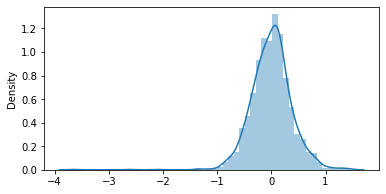

In [39]:
res = ytrain - y_train_pred
plt.figure(figsize=(6,3))
sns.distplot(res)
plt.show()

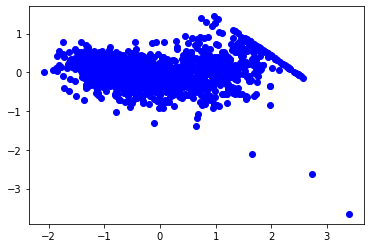

In [40]:
plt.scatter(y_train_pred,res , c ="blue") 
plt.show() 


In [41]:
feature_cols.remove('Exterior1st_Siding')
lm_14 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.856
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     396.0
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:55:23   Log-Likelihood:                -696.22
No. Observations:                 1554   AIC:                             1440.
Df Residuals:                     1530   BIC:                             1569.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [42]:
feature_cols.remove('Exterior2nd_Siding')
lm_15 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.856
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     414.0
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:55:51   Log-Likelihood:                -696.57
No. Observations:                 1554   AIC:                             1439.
Df Residuals:                     1531   BIC:                             1562.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [43]:
feature_cols.remove('GrLivArea')
lm_16 = model(feature_cols)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.799
Model:                             OLS   Adj. R-squared:                  0.796
Method:                  Least Squares   F-statistic:                     289.5
Date:                 Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                         11:56:39   Log-Likelihood:                -957.36
No. Observations:                 1554   AIC:                             1959.
Df Residuals:                     1532   BIC:                             2076.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           